In [ ]:
import pandas as pd
df_orig = pd.read_csv("/content/311_all.csv")
df = pd.read_csv("/content/311_all.csv")

In [ ]:
df.columns

Index(['Unnamed: 0', 'CASE_ENQUIRY_ID', 'OPEN_DT', 'SUBJECT', 'REASON', 'TYPE',
       'LOCATION', 'propid', 'SOURCE', 'X', 'Y', 'LocationID', 'ObjectID',
       'TLID', 'BLK_ID_10', 'BG_ID_10', 'CT_ID_10', 'NSA_NAME', 'BRA_PD',
       'PUBLIC', 'HOUSING', 'UNCIVILUSE', 'BIGBUILD', 'GRAFFITI', 'TRASH',
       'PRIVATENEGLECT', 'PUBLICDENIG', 'PROBLEM', 'CLOSED_DT', 'BLOCK_ID'],
      dtype='object')

In [ ]:
df.head(5)

,Unnamed: 0,CASE_ENQUIRY_ID,OPEN_DT,SUBJECT,REASON,TYPE,LOCATION,propid,SOURCE,X,...,HOUSING,UNCIVILUSE,BIGBUILD,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM,CLOSED_DT,BLOCK_ID
0,0,101003148635,2020-01-01,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,"70 Burbank St, Boston, MA 02115",A162736,Mobile Request,-71.088920,...,0,0,0,0,1,0,1,1,2020-03-12,NaN
1,1,101003148558,2020-01-01,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,"461 Gallivan Blvd, Dorchester, MA 02124",A62325,Constituent Call,-71.057980,...,0,0,0,0,1,0,1,1,2020-01-13,5005.0
2,2,101003148571,2020-01-01,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"INTERSECTION of Milwood St & Gallivan Blvd, Do...",I11942,Mobile Request,-71.057802,...,0,0,0,0,0,0,0,0,2020-01-13,NaN
3,3,101003148542,2020-01-01,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"10 Stanbro St, Hyde Park, MA 02136",A130087,Mobile Request,-71.132410,...,0,0,0,0,0,0,0,0,2020-01-18,2018.0
4,4,101003148439,2020-01-01,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"8 Pleasanton St, Dorchester, MA 02121",A111359,Mobile Request,-71.087270,...,0,0,0,0,0,0,0,0,2020-01-02,3006.0


In [ ]:
df.shape

(10000, 30)

In [ ]:
closed_data = df[df['CLOSED_DT'].notnull()]
closed_data.to_csv('/content/311_closed.csv', index=False)
closed_data.shape

(8882, 30)

In [ ]:
cdf = pd.read_csv("/content/311_closed.csv")

Closed data analysis

,Unnamed: 0,CASE_ENQUIRY_ID,OPEN_DT,SUBJECT,REASON,TYPE,LOCATION,propid,SOURCE,X,...,HOUSING,UNCIVILUSE,BIGBUILD,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM,CLOSED_DT,BLOCK_ID
0,0,101003148635,2020-01-01,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,"70 Burbank St, Boston, MA 02115",A162736,Mobile Request,-71.088920,...,0,0,0,0,1,0,1,1,2020-03-12,NaN
1,1,101003148558,2020-01-01,Mayor's 24 Hour Hotline,Abandoned Bicycle,Abandoned Bicycle,"461 Gallivan Blvd, Dorchester, MA 02124",A62325,Constituent Call,-71.057980,...,0,0,0,0,1,0,1,1,2020-01-13,5005.0
2,2,101003148571,2020-01-01,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"INTERSECTION of Milwood St & Gallivan Blvd, Do...",I11942,Mobile Request,-71.057802,...,0,0,0,0,0,0,0,0,2020-01-13,NaN
3,3,101003148542,2020-01-01,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"10 Stanbro St, Hyde Park, MA 02136",A130087,Mobile Request,-71.132410,...,0,0,0,0,0,0,0,0,2020-01-18,2018.0
4,4,101003148439,2020-01-01,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Abandoned Vehicles,"8 Pleasanton St, Dorchester, MA 02121",A111359,Mobile Request,-71.087270,...,0,0,0,0,0,0,0,0,2020-01-02,3006.0


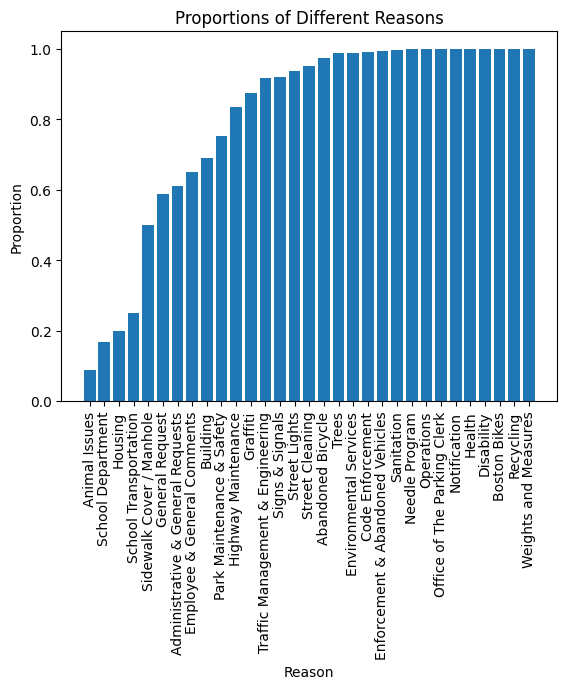

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fall = "/content/311_all.csv"
fclosed = "/content/311_closed.csv"

df_orig = pd.read_csv(fall)
df = pd.read_csv(fall)
closed_data = df[df['CLOSED_DT'].notnull()]
closed_data.to_csv(fclosed, index=False)
cdf = pd.read_csv(fclosed)


pdf = cdf.groupby('REASON').agg('count')/df.groupby('REASON').agg('count')
pdf = pdf[['Unnamed: 0']]
pdf.rename(columns={'Unnamed: 0': 'Proportions'}, inplace = True)
pdf = pdf[pdf['Proportions'].notnull()]
pdf = pdf.sort_values(by='Proportions')
plt.bar(pdf.index, pdf['Proportions'], )
plt.title('Proportions of Different Reasons')
plt.xlabel('Reason')
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.show()


In [ ]:
df.columns

Index(['Unnamed: 0', 'CASE_ENQUIRY_ID', 'OPEN_DT', 'SUBJECT', 'REASON', 'TYPE',
       'LOCATION', 'propid', 'SOURCE', 'X', 'Y', 'LocationID', 'ObjectID',
       'TLID', 'BLK_ID_10', 'BG_ID_10', 'CT_ID_10', 'NSA_NAME', 'BRA_PD',
       'PUBLIC', 'HOUSING', 'UNCIVILUSE', 'BIGBUILD', 'GRAFFITI', 'TRASH',
       'PRIVATENEGLECT', 'PUBLICDENIG', 'PROBLEM', 'CLOSED_DT', 'BLOCK_ID'],
      dtype='object')

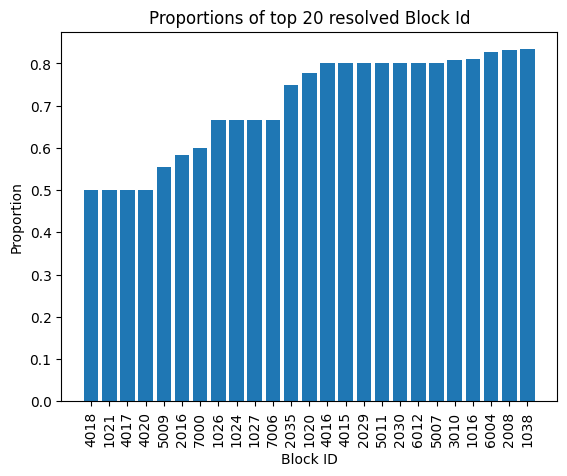

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fall = "/content/311_all.csv"
fclosed = "/content/311_closed.csv"

df_orig = pd.read_csv(fall)
df = pd.read_csv(fall)
closed_data = df[df['CLOSED_DT'].notnull()]
closed_data.to_csv(fclosed, index=False)
cdf = pd.read_csv(fclosed)

pdf = cdf.groupby('BLOCK_ID').agg('count')/df.groupby('BLOCK_ID').agg('count')
pdf = pdf[['Unnamed: 0']]
pdf.rename(columns={'Unnamed: 0': 'Proportions'}, inplace = True)
pdf = pdf[pdf['Proportions'].notnull()]

pdf = pdf.reset_index().rename(columns={'index': 'BLOCK_ID'})
pdf['BLOCK_ID'] = pdf['BLOCK_ID'].astype(str).str.slice(stop=-2)
pdf = pdf.sort_values(by='Proportions')
# pdf.to_csv("/content/block.csv", index=False)
plt.bar(pdf['BLOCK_ID'][:25], pdf['Proportions'][:25] )
plt.title('Proportions of top 20 resolved Block Id')
plt.xlabel('Block ID')
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.show()

